In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = pd.read_csv('telecom_churn.csv')
print(df.head())

# Step 2.1: Basic Info
print(f"\nShape: {df.shape}")
print(df.info())
print("\nChurn Distribution:\n", df['churn'].value_counts())

# Step 2.2: Summary Stats
print("\nDescriptive Statistics:\n", df.describe())

# Step 2.3: Visualizations
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Bar plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'churn':
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

# Step 3: Data Preprocessing

# Convert numeric-like columns and handle errors
df['data_used'] = pd.to_numeric(df['data_used'], errors='coerce')
df['estimated_salary'] = pd.to_numeric(df['estimated_salary'], errors='coerce')

# Remove invalid values
df = df[(df['data_used'] >= 0) & (df['calls_made'] >= 0) & (df['sms_sent'] >= 0)]

# Drop missing values
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Ensure churn is binary
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

# Step 3.3: Scaling
X = df.drop('churn', axis=1)
y = df['churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('telecom_churn.csv')
print(df.head())

   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1   

In [4]:
# Step 2.1: Basic Info
print(f"\nShape: {df.shape}")
print(df.info())
print("\nChurn Distribution:\n", df['churn'].value_counts())


Shape: (243553, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB
N

In [5]:
# Step 2.2: Summary Stats
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
          customer_id            age        pincode  num_dependents  \
count  243553.000000  243553.000000  243553.000000   243553.000000   
mean   121777.000000      46.077609  549501.270541        1.997500   
std     70307.839393      16.444029  259808.860574        1.414941   
min         1.000000      18.000000  100006.000000        0.000000   
25%     60889.000000      32.000000  324586.000000        1.000000   
50%    121777.000000      46.000000  548112.000000        2.000000   
75%    182665.000000      60.000000  774994.000000        3.000000   
max    243553.000000      74.000000  999987.000000        4.000000   

       estimated_salary     calls_made       sms_sent      data_used  \
count     243553.000000  243553.000000  243553.000000  243553.000000   
mean       85021.137839      49.010548      23.945404    4993.186025   
std        37508.963233      29.453556      14.733575    2942.019547   
min        20000.000000     -10.000000      -5.000000  

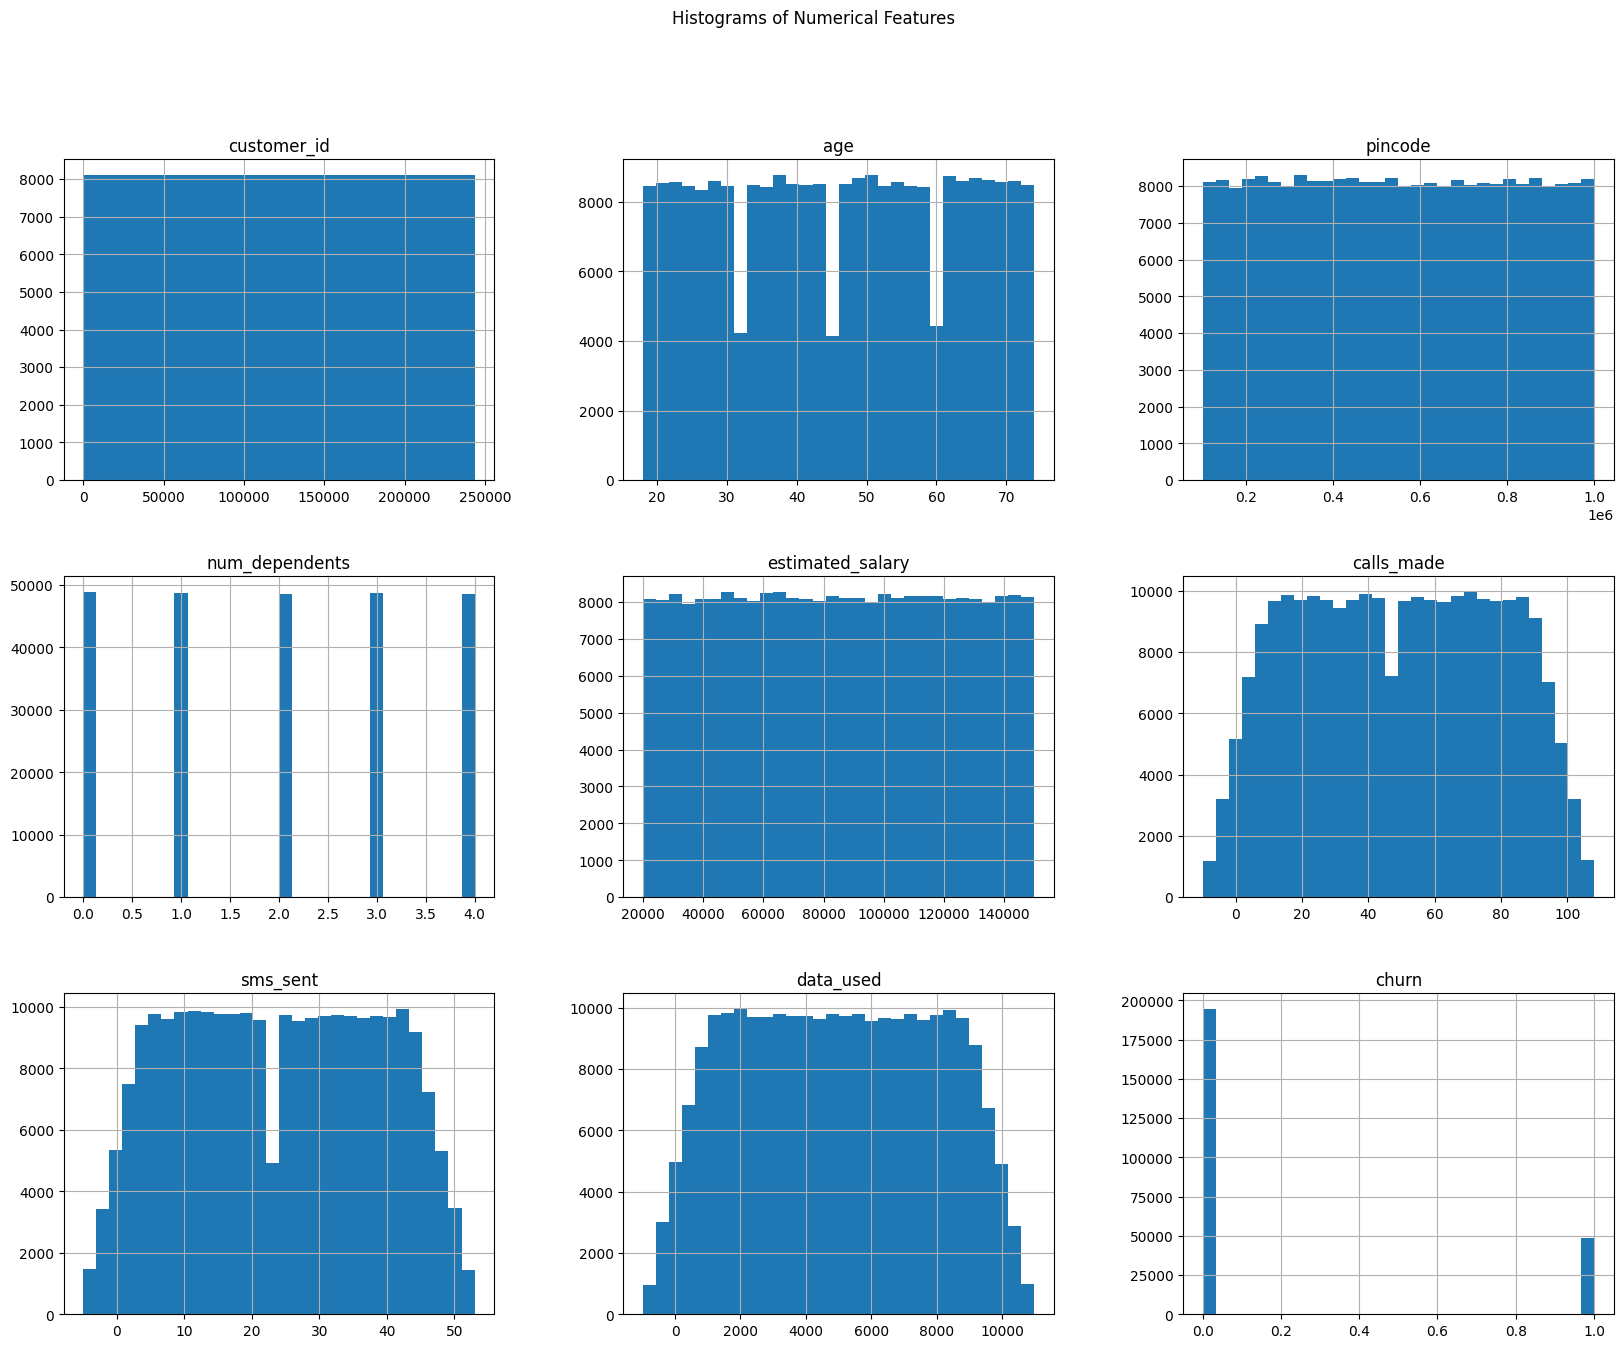

In [6]:
# Step 2.3: Visualizations
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

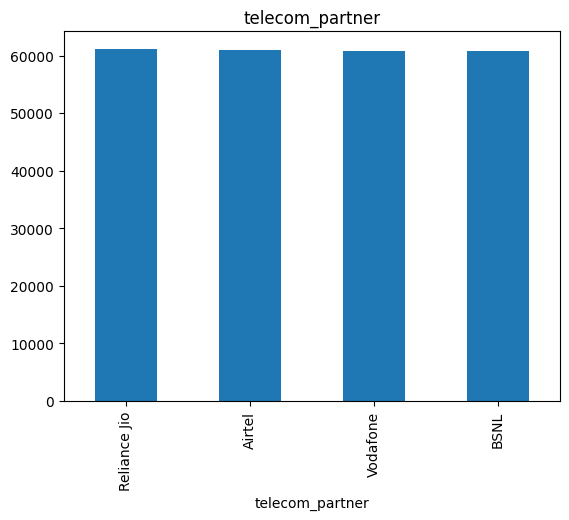

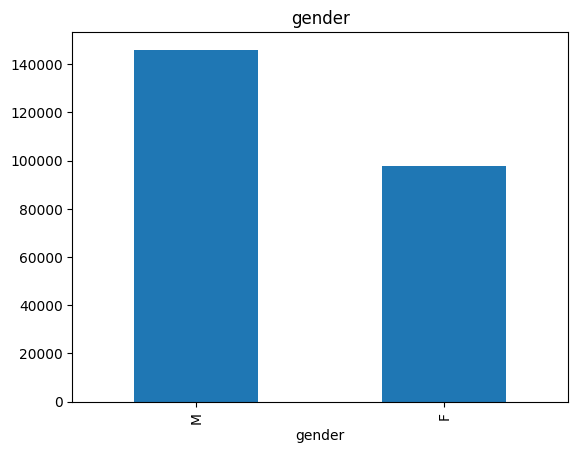

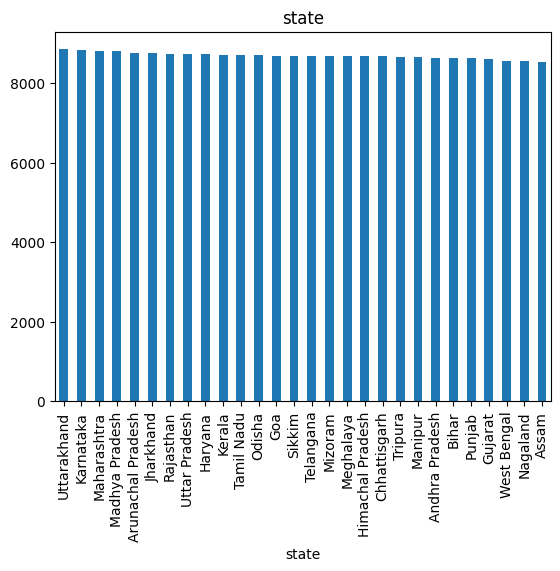

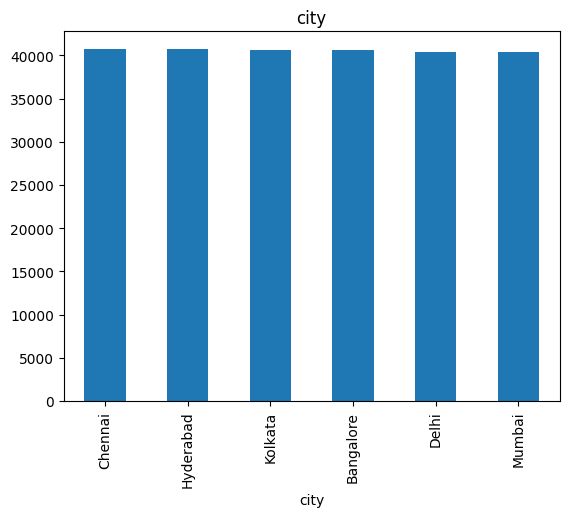

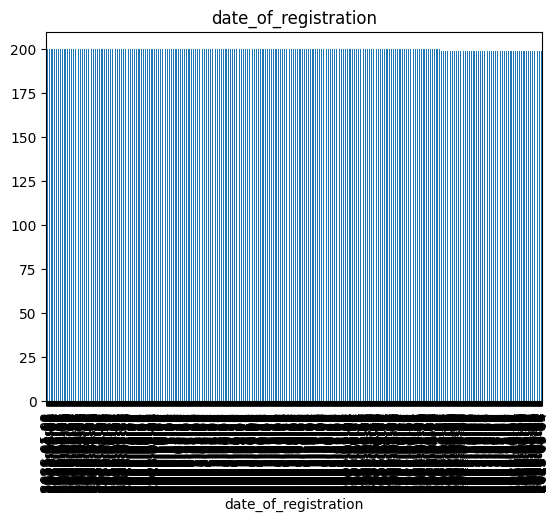

In [7]:
# Bar plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'churn':
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

In [8]:
# Convert numeric-like columns and handle errors
df['data_used'] = pd.to_numeric(df['data_used'], errors='coerce')
df['estimated_salary'] = pd.to_numeric(df['estimated_salary'], errors='coerce')


In [9]:
# Remove invalid values
df = df[(df['data_used'] >= 0) & (df['calls_made'] >= 0) & (df['sms_sent'] >= 0)]

In [10]:
# Drop missing values
df.dropna(inplace=True)



In [12]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [13]:
# Ensure churn is binary
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

In [14]:
# Step 3.3: Scaling
X = df.drop('churn', axis=1)
y = df['churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Step 5: Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Step 6: Evaluation
y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8002

Confusion Matrix:
 [[35844     0]
 [ 8950     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     35844
           1       0.00      0.00      0.00      8950

    accuracy                           0.80     44794
   macro avg       0.40      0.50      0.44     44794
weighted avg       0.64      0.80      0.71     44794



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
